In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Repository/Datasets/train'
valid_path = 'Repository/Datasets/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Repository/Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Repository/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Repository/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
2/2 [==============================] - 17s 8s/step - loss: 8.1579 - accuracy: 0.2188 - val_loss: 7.3178 - val_accuracy: 0.3276
Epoch 2/20
2/2 [==============================] - 12s 6s/step - loss: 5.7573 - accuracy: 0.4375 - val_loss: 2.3615 - val_accuracy: 0.5172
Epoch 3/20
2/2 [==============================] - 12s 6s/step - loss: 4.4984 - accuracy: 0.3281 - val_loss: 9.1245 - val_accuracy: 0.1552
Epoch 4/20
2/2 [==============================] - 14s 7s/step - loss: 5.1965 - accuracy: 0.4062 - val_loss: 4.9202 - val_accuracy: 0.3276
Epoch 5/20
2/2 [==============================] - 13s 6s/step - loss: 3.7820 - accuracy: 0.3906 - val_loss: 1.9169 - val_accuracy: 0.4828
Epoch 6/20
2/2 [==============================] - 12s 6s/step - loss: 3.2602 - accuracy: 0.4375 - val_loss: 3.0969 - val_accuracy: 0.5172
Epoch 7/20
2/2 [==============================] - 15s 7s/step - loss: 2.4399 - accuracy: 0.4688 

In [17]:
import matplotlib.pyplot as plt

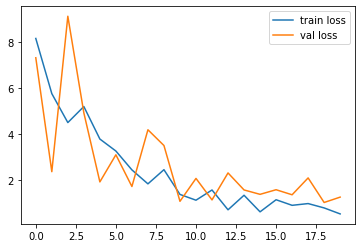

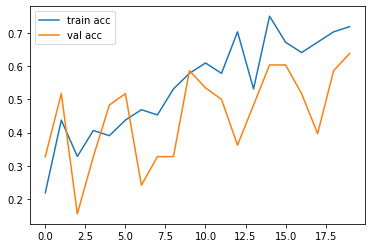

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[1.2109170e-02, 9.2138666e-01, 6.6504166e-02],
       [2.0212958e-02, 9.1957384e-01, 6.0213294e-02],
       [2.9827273e-02, 9.0376973e-01, 6.6402979e-02],
       [1.5892325e-05, 1.4796269e-03, 9.9850452e-01],
       [1.1523415e-02, 9.5071679e-01, 3.7759755e-02],
       [4.1047856e-03, 9.7888607e-01, 1.7009150e-02],
       [4.0372619e-03, 6.4763451e-01, 3.4832823e-01],
       [4.0664378e-01, 3.6011252e-01, 2.3324372e-01],
       [8.9253811e-03, 9.7192401e-01, 1.9150695e-02],
       [1.7338929e-05, 5.9439975e-05, 9.9992323e-01],
       [1.6599258e-03, 9.9004585e-01, 8.2943318e-03],
       [1.3354035e-03, 9.9738079e-01, 1.2836769e-03],
       [8.6746730e-02, 8.7873381e-01, 3.4519412e-02],
       [3.6154029e-01, 5.9151602e-01, 4.6943676e-02],
       [1.0780676e-02, 9.6437120e-01, 2.4848107e-02],
       [4.5986963e-03, 9.8002428e-01, 1.5376991e-02],
       [1.8219696e-03, 9.8124939e-01, 1.6928544e-02],
       [2.6567192e-03, 9.9079895e-01, 6.5443232e-03],
       [2.8927517e-01, 6.253

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('Repository/Datasets/Test/diseased cotton leaf/dis_leaf(124).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1